# Ensembles of Classification Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
cancer = load_breast_cancer()

In [5]:
list1 = list(cancer.feature_names)
df0 = pd.DataFrame(cancer.data,columns = list1)
df0[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y = cancer.target
X = cancer.data

In [7]:
X.shape

(569, 30)

### Validation Approach

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,
                                                 random_state = 0)

#### Single Tree (max_depth = 4)

In [9]:
tree1 = DecisionTreeClassifier(max_depth = 4)
tree1.fit(X_train,y_train)
pred = tree1.predict(X_test)
tree1.score(X_test,y_test)

0.9230769230769231

### Bagging on B = 500 Classification Trees

In [10]:
bag_model = RandomForestClassifier(max_features = 30,
                                   max_depth = 4,
                                   n_estimators = 500,
                                   random_state=0)
bag_model.fit(X_train,y_train)
pred = bag_model.predict(X_test)
bag_model.score(X_test,y_test)

0.9300699300699301

#### Changing B=500 to B=25 trees

In [11]:
bag_model2 = RandomForestClassifier(max_features = 30,
                                   max_depth = 4,                                    
                                   n_estimators = 25,
                                    random_state=0)
bag_model2.fit(X_train,y_train)
pred = bag_model2.predict(X_test)
bag_model2.score(X_test,y_test)

0.9230769230769231

## Random Forest on Classification Trees

In [12]:
# Not all 13 predictors will be considered at each split
# max_features m < n. predictors p

In [13]:
# I will use m = 4 predictors only

In [14]:
forest = RandomForestClassifier(max_features = 5,n_estimators = 500,
                                max_depth = 4,random_state = 1)
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.9440559440559441

#### Changing B=500 to B=25 trees

In [15]:
forest2 = RandomForestClassifier(max_features = 5,n_estimators = 25,
                                max_depth = 4,random_state = 1)
forest2.fit(X_train,y_train)
forest2.score(X_test,y_test)

0.9370629370629371

### importance of each predictor (feature importance)

In [16]:
# Using B=500 model

In [17]:
forest = RandomForestClassifier(max_features = 5,n_estimators = 500,
                                max_depth = 4,random_state = 1)
forest.fit(X_train,y_train)
forest.feature_importances_

array([0.0392008 , 0.01166103, 0.05184134, 0.04173711, 0.0035946 ,
       0.0101669 , 0.06064789, 0.1038886 , 0.00269401, 0.00280126,
       0.01117846, 0.00446715, 0.01208892, 0.03068875, 0.00265304,
       0.00383106, 0.00567973, 0.00259535, 0.00176844, 0.00177464,
       0.11579474, 0.01350636, 0.14129173, 0.11495622, 0.00969281,
       0.01269216, 0.04033597, 0.13576649, 0.00626952, 0.00473491])

In [18]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
df9 = pd.DataFrame(forest.feature_importances_*100,
                   index = cancer.feature_names,
                   columns = ['Importance'])
df9 = df9.sort_values(by='Importance',axis=0,ascending = False)
df9

,Importance
worst perimeter,14.129173
worst concave points,13.576649
worst radius,11.579474
worst area,11.495622
mean concave points,10.388860
mean concavity,6.064789
mean perimeter,5.184134
mean area,4.173711
worst concavity,4.033597
mean radius,3.920080


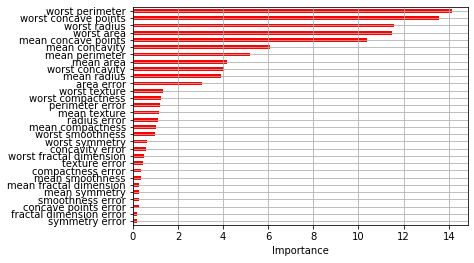

In [20]:
df9 = df9.sort_values(by='Importance',axis=0)
df9.plot(kind='barh',color='r',legend=False)
plt.xlabel('Importance')
plt.grid()

Top five are most important features

## Boosting (0.01 learning rate)

In [21]:
# limit the depth of the trees to 4 splits

In [22]:
model1 = GradientBoostingClassifier(n_estimators = 25,
                                     learning_rate = 0.01,
                                     max_depth = 4, random_state =1)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.9230769230769231

### Change learning rate to 0.10

In [23]:
model2 = GradientBoostingClassifier(n_estimators = 25,
                                      learning_rate = 0.1,
                                      max_depth = 4, random_state =1)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.951048951048951

In [24]:
# feature importance from model2
df9 = pd.DataFrame(model2.feature_importances_*100,
                   index = cancer.feature_names,
                   columns = ['Importance'])
df9 = df9.sort_values(by='Importance',axis=0,ascending = False)
df9[:11]

,Importance
worst perimeter,73.709612
worst concave points,7.801738
mean concave points,4.010190
worst texture,3.783620
mean texture,2.604245
concave points error,1.915741
worst radius,1.541126
worst area,1.366006
area error,1.000423
mean symmetry,0.706863


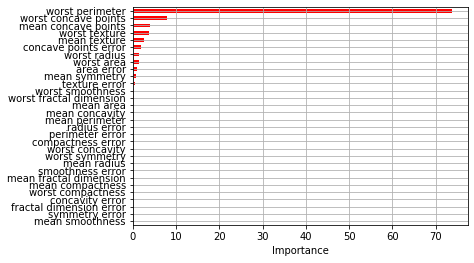

In [25]:
df9 = df9.sort_values(by='Importance',axis=0)
df9.plot(kind='barh',color='r',legend=False)
plt.xlabel('Importance')
plt.grid()

Only nine features are important

## Use of GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,
                                                 random_state = 0)
model3 = GradientBoostingClassifier(n_estimators = 25,
                                      max_depth = 4, random_state =1)

In [28]:
lrates = np.linspace(0.01,0.4,8)
lrates

array([0.01      , 0.06571429, 0.12142857, 0.17714286, 0.23285714,
       0.28857143, 0.34428571, 0.4       ])

In [29]:
params = dict(learning_rate = lrates)

In [30]:
grid1 = GridSearchCV(model3,param_grid = params,cv = 5)
grid1.fit(X_train,y_train)
grid1.score(X_test,y_test)

0.9440559440559441

In [31]:
grid1.best_params_

{'learning_rate': 0.12142857142857143}

## GridSearchCV -two parameters

In [32]:
# Consider 6 values for each parameter
params = {'learning_rate': np.arange(0.02,0.05,0.005),
              'max_features': list(range(3,9))}
params

{'learning_rate': array([0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045]),
 'max_features': [3, 4, 5, 6, 7, 8]}

In [33]:
grid2 = GridSearchCV(model3, param_grid = params,cv = 5)
grid2.fit(X_train,y_train)
grid2.score(X_test,y_test)

0.958041958041958

In [34]:
grid2.best_params_

{'learning_rate': 0.04000000000000001, 'max_features': 8}

cv_results_ has the accuracy rates of each fold and their average in column mean_test_score

In [35]:
# grid2.cv_results_ has information
# about the results of each fold
# and the average accuracy rate
# for each value of learning_rate, max_features

In [36]:
# store the results into dataframe
results = pd.DataFrame(grid2.cv_results_)
results.dtypes

mean_fit_time          float64
std_fit_time           float64
mean_score_time        float64
std_score_time         float64
param_learning_rate     object
param_max_features      object
params                  object
split0_test_score      float64
split1_test_score      float64
split2_test_score      float64
split3_test_score      float64
split4_test_score      float64
mean_test_score        float64
std_test_score         float64
rank_test_score          int32
dtype: object

In [37]:
# Select columns with the parameter values 
# and average accuracy rates

In [38]:
list1 = list([4,5,12])
df9 = results.iloc[:,list1].copy()
df9[:13]

,param_learning_rate,param_max_features,mean_test_score
0,0.02,3,0.941423
1,0.02,4,0.953160
2,0.02,5,0.950807
3,0.02,6,0.950752
4,0.02,7,0.941341
5,0.02,8,0.948372
6,0.025,3,0.943776
7,0.025,4,0.953160
8,0.025,5,0.953133
9,0.025,6,0.953105


In [39]:
df9.param_learning_rate = df9.param_learning_rate.astype('float64')
df9.param_learning_rate = df9.param_learning_rate.round(3)
df9[:13]

,param_learning_rate,param_max_features,mean_test_score
0,0.020,3,0.941423
1,0.020,4,0.953160
2,0.020,5,0.950807
3,0.020,6,0.950752
4,0.020,7,0.941341
5,0.020,8,0.948372
6,0.025,3,0.943776
7,0.025,4,0.953160
8,0.025,5,0.953133
9,0.025,6,0.953105


In [ ]:
# Show mean_test_score (the accuracy rate)
# for each combination of: max_features, learning_rate
# in a two-way table

In [40]:
df1 = df9.pivot_table('mean_test_score',
                      columns = 'param_learning_rate',
                      index = 'param_max_features')
df1

param_learning_rate,0.020,0.025,0.030,0.035,0.040,0.045
param_max_features,,,,,,
3,0.941423,0.943776,0.946101,0.943748,0.946074,0.948427
4,0.953160,0.953160,0.957866,0.960192,0.960192,0.957839
5,0.950807,0.953133,0.960164,0.957811,0.962490,0.962490
6,0.950752,0.953105,0.948399,0.955458,0.964843,0.962490
7,0.941341,0.948372,0.948345,0.955404,0.957756,0.957811
8,0.948372,0.955458,0.962462,0.962462,0.967168,0.964788


In [52]:
# column names
df1.columns

Float64Index([0.02, 0.025, 0.03, 0.035, 0.04, 0.045], dtype='float64', name='param_learning_rate')

In [55]:
# row names
df1.index

Int64Index([3, 4, 5, 6, 7, 8], dtype='int64', name='param_max_features')

In [64]:
# transform df1 dataframe to numpy array
arates = df1.values
arates = np.round(arates,3)
arates = arates.transpose()
arates

array([[0.941, 0.953, 0.951, 0.951, 0.941, 0.948],
       [0.944, 0.953, 0.953, 0.953, 0.948, 0.955],
       [0.946, 0.958, 0.96 , 0.948, 0.948, 0.962],
       [0.944, 0.96 , 0.958, 0.955, 0.955, 0.962],
       [0.946, 0.96 , 0.962, 0.965, 0.958, 0.967],
       [0.948, 0.958, 0.962, 0.962, 0.958, 0.965]])

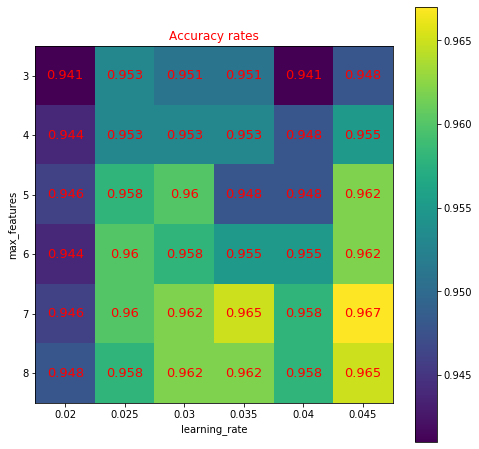

In [66]:
plt.figure(figsize=(8,8))
plt.xticks(range(6),df1.columns)
plt.yticks(range(6),df1.index)
plt.ylabel('max_features')
plt.xlabel('learning_rate')
plt.title('Accuracy rates',c='r')
plt.imshow(arates)
for i in range(6):
    for j in range(6):
        text = plt.text(j,i,arates[i,j],
                        ha="center",
                        va="center",
                        color="r",
                        size = 13)
plt.colorbar();